### Draws accuracy Plot

In [1]:
%load_ext autoreload
%autoreload 

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import sys
import matplotlib.colors

sites = pd.read_csv('e:/data_turbines/states.csv')
diffJM = ["#FF0000", "#F81318", "#F12731", "#EB3B4A", "#EB5C66", "#EB7D82", 
              "#EB9E9E", "#F1BEBE", "#FFFFFF", "#FFFFFF", "#FFFFFF", "#BCB9FB", 
              "#9B96FA", "#6A6CFA", "#3A43FA", "#1D21FC", "#0000FF", "#0000ce"]

diffJM_colormap = matplotlib.colors.ListedColormap(diffJM)

In [3]:
def plot_accuracy(site):
   s = math.trunc(int(site) / 500)  
   site = str(s)+'-'+site+'-12'
   print(site)
#err *= err
#err = np.abs(err)
   
   f = h5py.File('e:/data_turbines/errorsMLPS2S-S'+site+'-1-12-R0.hdf5', 'r+')
   val_y = f['/errors/val_yu']
   val_yp = f['/errors/val_ypu']
   
   err = val_y[()] - val_yp[()]

   nvals = 8755
   prop = 100
   pixels = np.zeros((12*prop, nvals))

   for i in range(12):
      for j in range(prop):
         pixels[(i*prop) + j,:] = err[:nvals,i]

   pixels[0,0] = -np.max(pixels)

   fig = plt.figure(figsize=(20,10))
   ax = plt.axes()

   def y_yhat(n):
      return(n/100)
   def yhat_y(n):
      return(n*100)


   def x_xhat(n):
      return(n/(24))
   def xhat_x(n):
      return(n*(24))

   parsed_site = site.split('-')
   a = sites.loc[sites['numero_site'] == int(parsed_site[1])]
   c=a.reset_index(drop=True)
   Lat = c.iloc[[0]].Lat_trunc.values[0]
   Lon = c.iloc[[0]].Lon_trunc.values[0]
   Sta = c.iloc[[0]].state.values[0]
   
   Name = ' [' + str(Lat)+', '+ str(Lon) +'] '+ str(Sta)
   print(Name)

#ax.set_ylabel('prediction (12 steps)')
   ax.yaxis.set_ticklabels([])
   ax.set_xlabel('steps')
   secay = ax.secondary_yaxis('left',functions=(y_yhat, yhat_y))
   secay.set_ylabel('Pred 12 steps ahead')

   secax = ax.secondary_xaxis('top',functions=(x_xhat, xhat_x))
   secax.set_xlabel('day')
   im = ax.imshow(pixels,cmap=diffJM_colormap)#bwr, seismic
   plt.colorbar(im, fraction=0.006, pad=0.04)
   parsed_site = site.split('-')
   plt.title('Accuracy graph site ' + parsed_site[1]+ Name)
   plt.savefig(parsed_site[1]+'_accuracy_MLP.pdf', format='pdf')
   plt.show()
   return

### site 54711  = 4.351511

109-54711-12
 [40.4308, -105.2214] CO


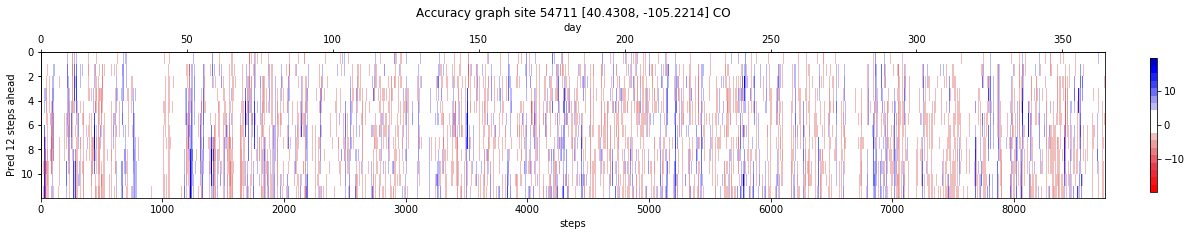

In [4]:
plot_accuracy('54711')

### site 122511 =  9.150335

245-122511-12
 [45.6648, -122.2867] WA


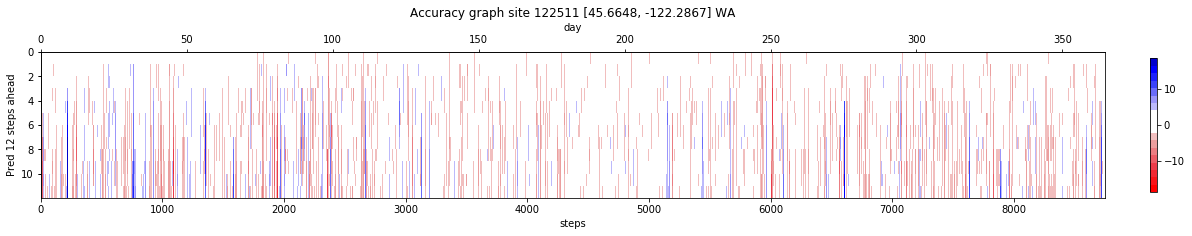

In [5]:
plot_accuracy('122511')

### site 116672  = 9.124504

233-116672-12
 [44.6401, -120.5305] OR


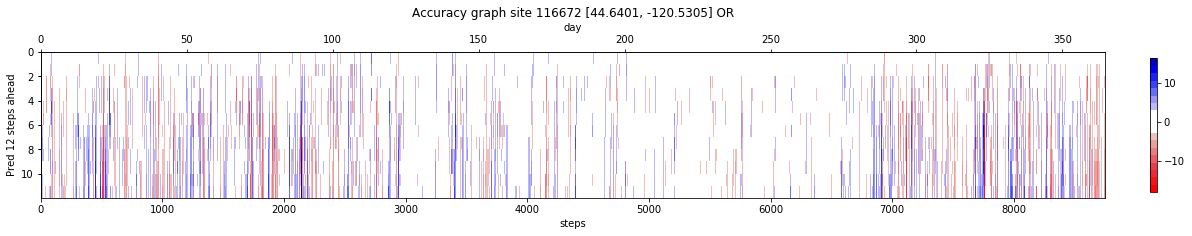

In [6]:
plot_accuracy('116672')

### site 23770  =  9.031360

47-23770-12
 [33.9014, -116.6329] CA


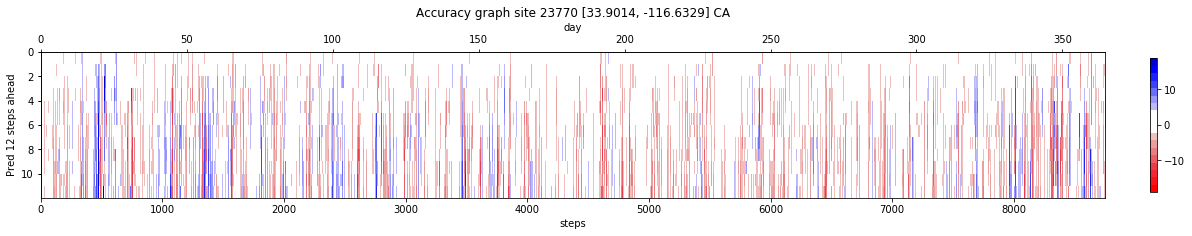

In [7]:
plot_accuracy('23770')

### site 94408   9.362467

188-94408-12
 [40.3933, -124.0597] CA


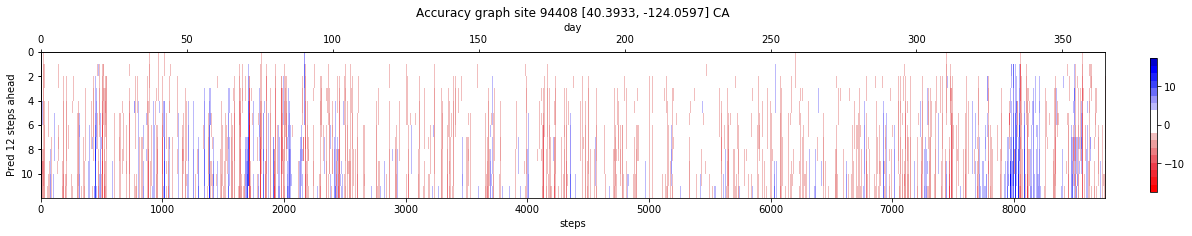

In [8]:
plot_accuracy('94408')

### site 95488  = 9.878614

190-95488-12
 [40.3926, -124.3448] CA


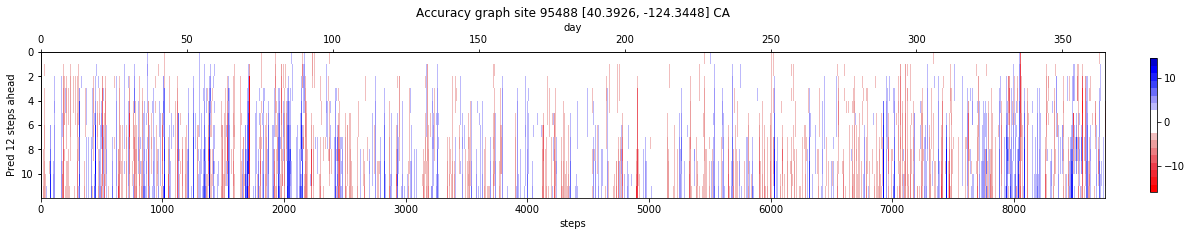

In [9]:
plot_accuracy('95488')

### site 232   =  9.041670

0-232-12
 [24.9084, -81.9192] ER


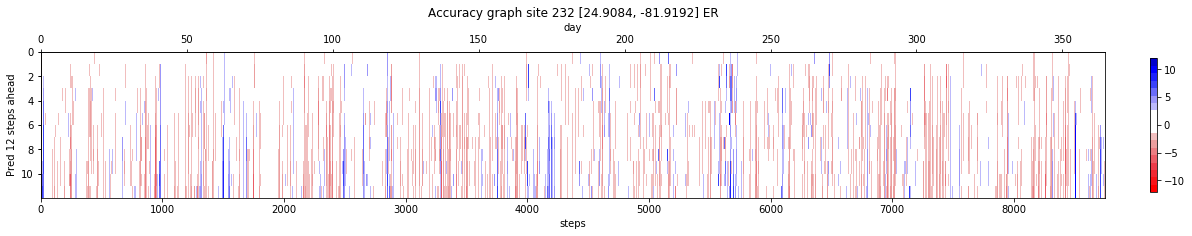

In [10]:
plot_accuracy('232')

site ### 115478 =  9.049440

230-115478-12
 [44.486999999999995, -120.0797] OR


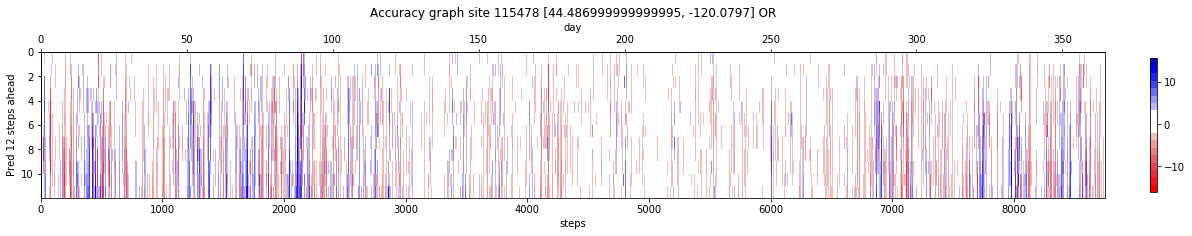

In [11]:
plot_accuracy('115478')

### site117094 = 9.051146

234-117094-12
 [46.1213, -113.1294] MT


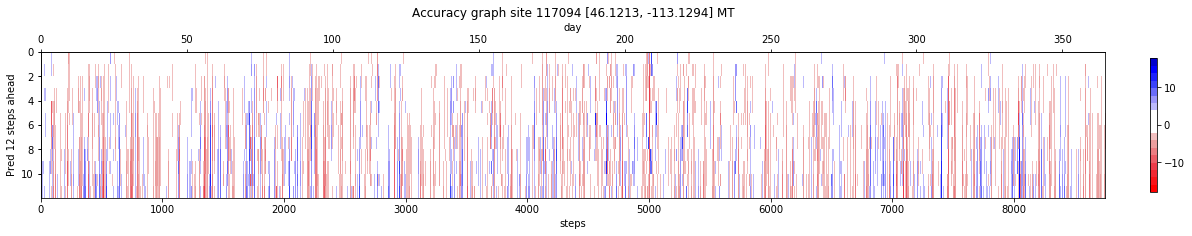

In [12]:
plot_accuracy('117094')

### site 152 = 9.096719

0-152-12
 [24.7297, -81.915] FL


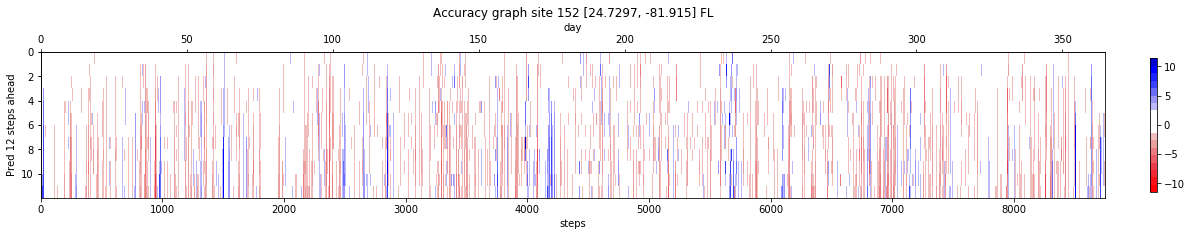

In [13]:
plot_accuracy('152')

### site 1534  =  9.119399

3-1534-12
 [26.3947, -82.7451] ER


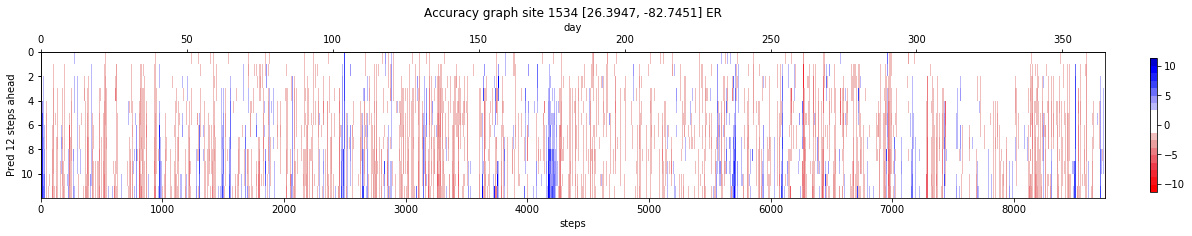

In [14]:
plot_accuracy('1534')

### site 46243 = 4.118561

plot_accuracy('46243')

### site 49802  = 4.332078

99-49802-12
 [39.8675, -105.2581] CO


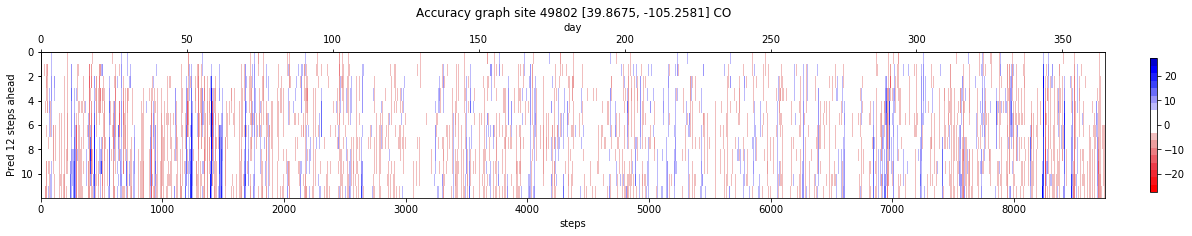

In [15]:
plot_accuracy('49802')

### site 41965 = 4.495922

83-41965-12
 [38.3748, -105.6783] CO


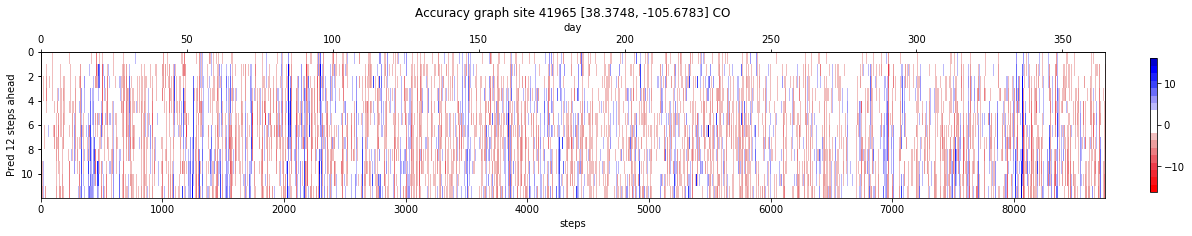

In [16]:
plot_accuracy('41965')

### site 45639 =  4.627710

91-45639-12
 [39.2417, -104.5149] CO


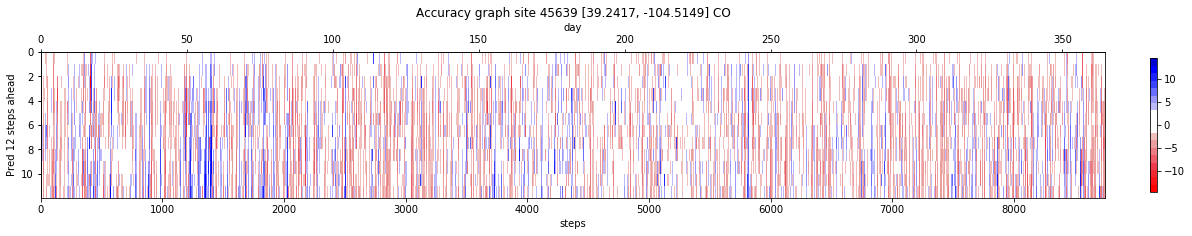

In [17]:
plot_accuracy('45639')

### site 41969 = 4.791502

83-41969-12
 [38.4119, -105.2802] CO


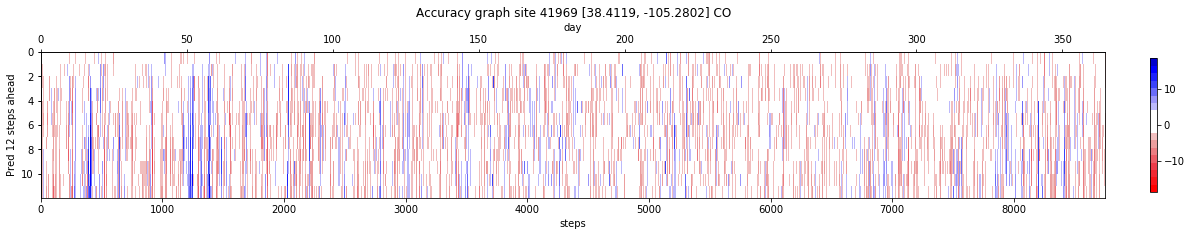

In [18]:
plot_accuracy('41969')

### site 12499   = 4.833704

24-12499-12
 [33.1975, -104.7141] NM


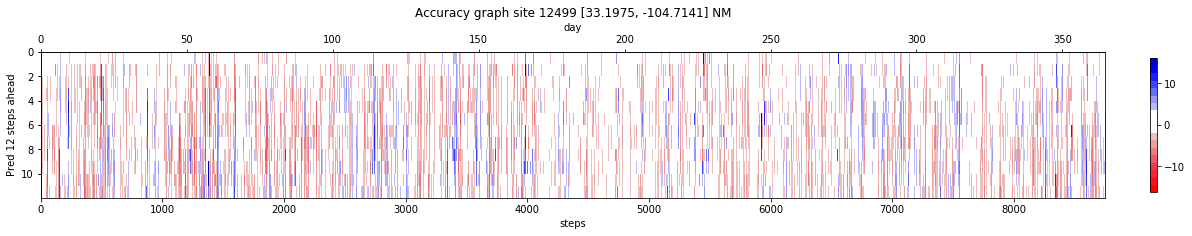

In [19]:
plot_accuracy('12499')

### site 8802 =  4.843573

17-8802-12
 [30.9191, -105.2512] TX


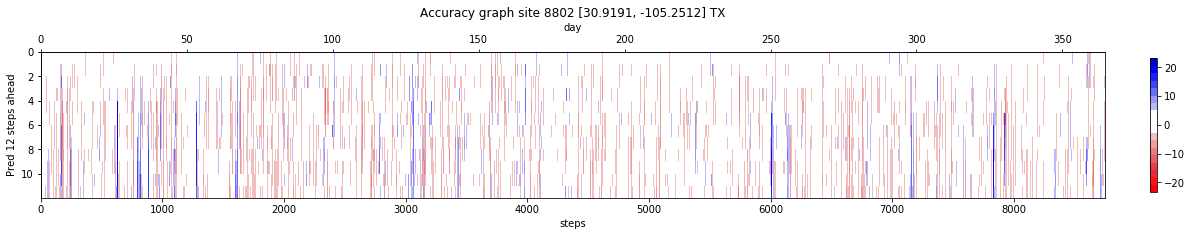

In [20]:
plot_accuracy('8802')

### site 94988  = 4.847150

189-94988-12
 [43.9516, -102.564] SD


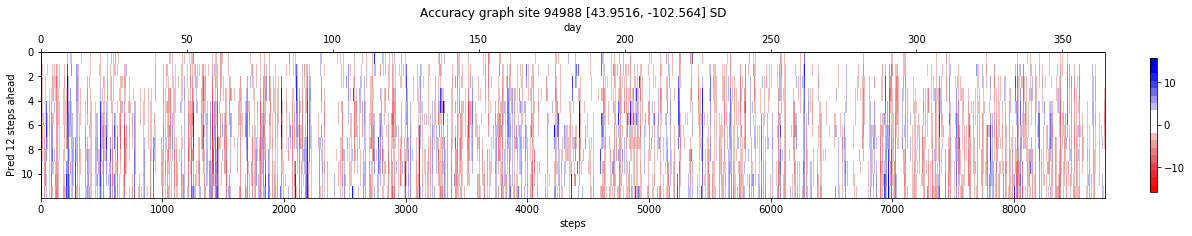

In [21]:
plot_accuracy('94988')

### site 94723 = 4.928249

189-94723-12
 [43.9253, -102.6907] SD


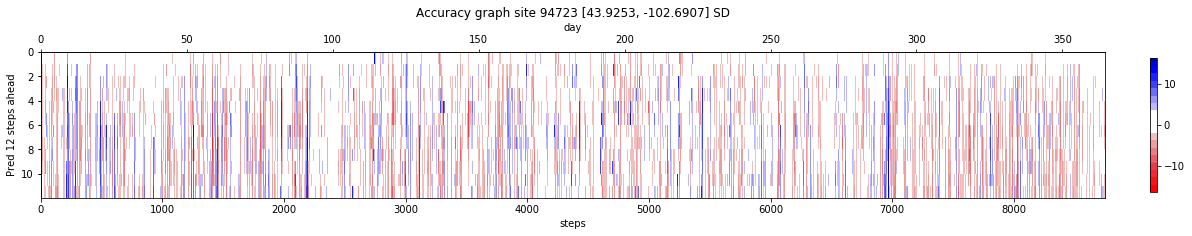

In [22]:
plot_accuracy('94723')